<h1><center>CSCI 4146/6409 - Process of Data Science (Summer 2023)</h1></center>
<h1><center>Assignment 3</h1></center>

<b>Tasneem Hoque</b>  
<b>B00841761<b>


<b>Karan Aggarwal</b>  
<b>B00912580<b>

### 1. [1.0] Data Preparation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("creditcard.csv")

#### a. Display and review the Train, Test, and Original Datasets. Make note of any peculiarities or unique aspects in the data that may require attention. [0.25]

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


It is noticeable that features v1-v28 was transformed and scaled already but features time and amount were not, so it is nessecary to scale them. Before doing that, we will visualize their distributions to find the best scaler to be used on the data.

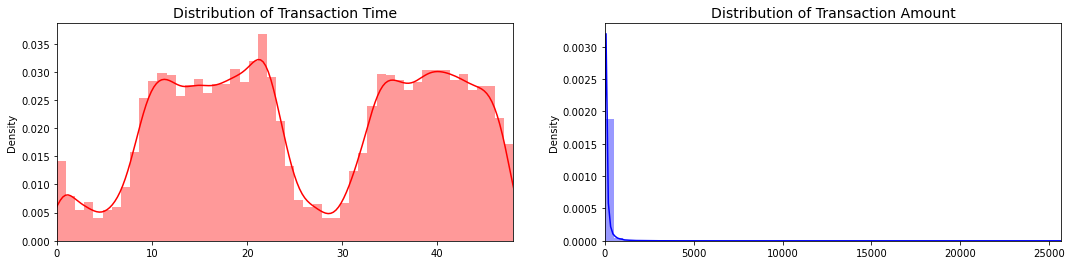

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18,4))

# Plot the distribution of 'Time' feature 
sns.distplot(data['Time'].values/(60*60), ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(data['Time'].values/(60*60)), max(data['Time'].values/(60*60))])

sns.distplot(data['Amount'].values, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(data['Amount'].values), max(data['Amount'].values)])

plt.show()

Judging from the plot above, we cannot use Standard Scaler as the features 'time' and 'amount' are not normally distributed. Min-Max scaler is also not recommended due to the outliers in the amount feature, so the best case scenario is to use the Robust Scaler, as it is robus to the outliers.

In [5]:
from sklearn.preprocessing import StandardScaler, RobustScaler
data['Amount'] = RobustScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data['Time'] = RobustScaler().fit_transform(data['Time'].values.reshape(-1,1))

In [6]:
# Split the train and test data set into 70:30 ratio.

train, test = train_test_split(data, test_size=0.3)

In [7]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
165433,0.384614,-0.465980,-0.274677,0.661793,-0.987428,-0.113175,-0.884138,0.890327,-0.102408,0.631077,...,0.054126,-0.135505,0.713280,-0.014685,-1.511683,-0.645723,0.205904,0.301009,1.949976,0
195783,0.546576,-0.364219,0.317871,0.161636,-0.670892,-0.144214,0.745004,1.463146,-0.288526,1.202291,...,-0.061159,0.470927,-0.113116,-0.055163,-0.177448,0.554605,0.161176,-0.290817,3.012646,0
202618,0.584182,-0.188336,1.248084,-0.742524,-0.530678,0.682526,-0.698370,0.690300,0.203543,-0.262318,...,0.390312,1.264884,-0.093584,0.527226,-0.687868,-0.236601,0.384231,0.265455,-0.296374,0
231371,0.728885,-0.735347,0.151362,-0.958292,-1.152587,-0.350466,-0.824424,1.483747,-0.332749,-1.916361,...,-0.123658,0.188946,-0.116035,0.051517,-0.745918,0.604611,-0.302178,-0.159577,2.375463,0
124320,-0.087372,-0.754072,0.356294,2.575574,1.030995,-1.779575,2.185911,-2.305981,-2.598775,-0.177644,...,2.612626,-1.312449,0.094911,0.203333,1.229022,0.039183,0.356997,0.182710,-0.027947,0


In [8]:
len(train)

199364

In [9]:
test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
282373,1.012265,0.156732,1.063919,-0.487379,-0.595187,1.048420,-0.694332,1.027485,-0.131451,-0.120848,...,-0.346799,-0.827847,0.072384,0.384810,-0.371629,0.123378,0.224312,0.083687,-0.199818,0
167362,0.398783,1.971810,-1.200239,-2.830201,-1.670140,1.732721,3.287608,-1.111164,0.818960,-0.336061,...,0.157371,0.191050,0.114907,0.622991,-0.123644,-0.192286,0.006081,-0.015564,1.241529,0
91129,-0.251037,1.125055,0.219125,0.232843,1.097245,-0.088415,-0.474253,0.219405,-0.127029,-0.084471,...,0.083554,0.252050,-0.108902,0.099149,0.613349,-0.304240,0.025289,0.024673,0.306016,0
284333,1.029817,1.500166,-1.133265,-1.664784,0.477475,-0.463467,-1.098692,0.425555,-0.315567,0.590383,...,0.387239,0.450674,-0.110803,1.191403,-0.136611,0.702337,-0.160833,-0.011859,3.870607,0
201733,0.579448,0.035105,0.920551,0.309947,-0.600783,0.516292,-1.019254,1.059393,-0.232359,-0.180693,...,-0.244154,-0.474945,0.066775,0.004169,-0.474044,0.140422,0.256005,0.098804,-0.257249,0


In [10]:
len(test)

85443

One odd thing noticeable in this data is the uneven distribution of data from class 0 and class 1. As see in the output below there are 99.83% rows of data where class is 0 and only 0.17% rows of data with where class is 1. This issue is addressed after the data is split into features and target in the section c.

In [11]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:title={'center':'Frequency by observation number'}, xlabel='Class', ylabel='Number of Observations'>

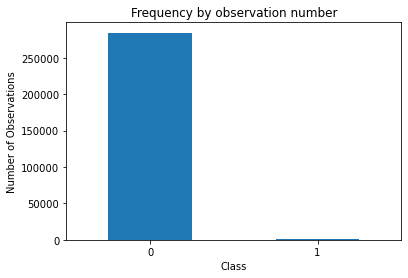

In [12]:
fnf = data["Class"].value_counts()
plt.xlabel("Class")
plt.ylabel("Number of Observations")
fnf.plot(kind = 'bar',title = 'Frequency by observation number',rot=0)

#### b. Merge the Train and Original datasets. Provide a justification for this action. [0.25]

In our scenario, there is no need to merge the Train and Original datasets as this would only cause in an overlap of the same dataset. Both the train and test dataset should be separate so that the model can be tested on unknown data it has not seen before. Since our dataset is very large there is no need for overlapping data.

#### c. Identify and remove any irrelevant features. Substantiate your choices. [0.25]

<AxesSubplot:title={'center':'Correlation with Class'}>

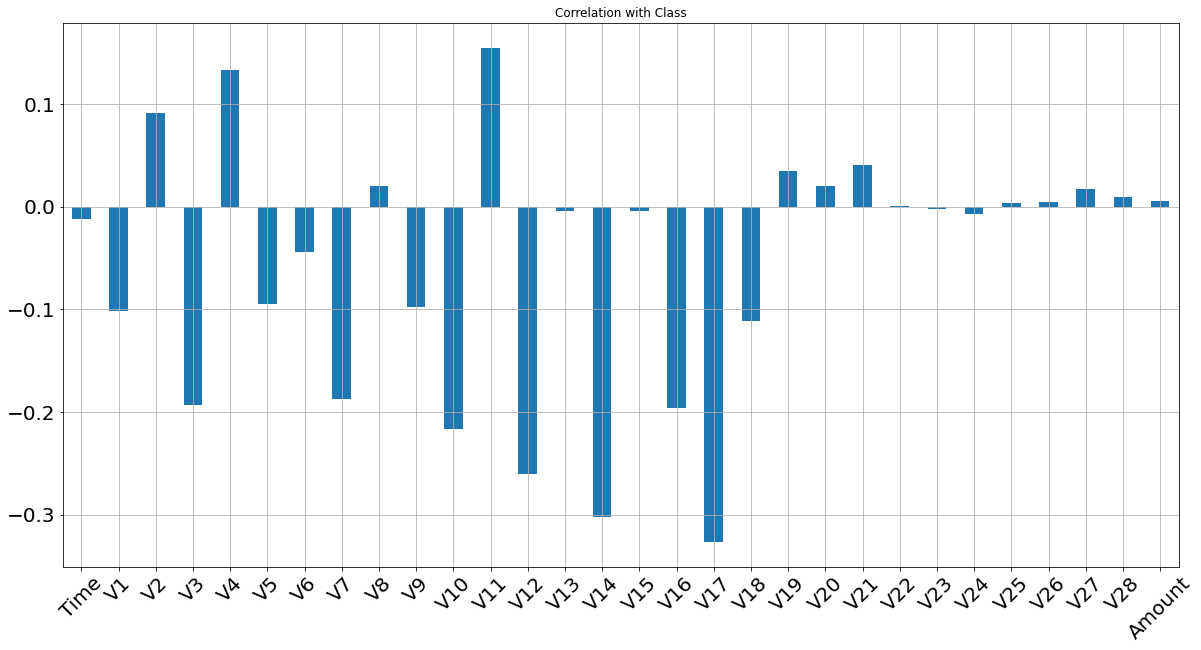

In [13]:
dataset2 = data.drop(columns = ['Class'])

dataset2.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class", fontsize = 20,
        rot = 45, grid = True)

The plot made above shows the correlation between the target variable and the feature variables. The features with the lowest correlation are v22, v23, v13, v15 and v25. We can drop these columns from our train and test sets to simplify our model.

In [14]:
train = train.drop(['V22', 'V23', 'V13', 'V15', 'V25'], axis=1)
test = test.drop(['V22', 'V23', 'V13', 'V15', 'V25'], axis=1)

In [15]:
print(train.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V24',
       'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [16]:
print(test.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V24',
       'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


#### d. Divide the dataset into features and targets. Detail your method and reasoning behind it. [0.25]

Separate the features (X) from the target variable (y) for both the training and testing datasets. X_train and X_test contain the feature data without the 'Class' column, while y_train and y_test contain only the 'Class' column as the target variable.

In [17]:
X_train = train.drop(['Class'],axis=1, inplace=False)
y_train = train[['Class']] 

X_test = test.drop(['Class'],axis=1, inplace=False)
y_test = test[['Class']] 

To address the imbalance in the data, different resampling methods are used. RandomUnderSampler randomly selects samples from the majority class to balance the class distribution. RandomOverSampler randomly replicates samples from the minority class to balance the class distribution. SMOTE generates synthetic samples for the minority class using interpolation. BorderlineSMOTE is a variant of SMOTE that focuses on samples near the decision boundary. This is only applied to the training set and not the test set to ensure there is no misrepresentation of data.

In [18]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

undersam = RandomUnderSampler(random_state=0)
oversam = RandomOverSampler(random_state=0)
smote = SMOTE(random_state=0)
borderlinesmote = BorderlineSMOTE(random_state=0)

X_train, y_train = undersam.fit_resample(X_train,y_train)
X_train, y_train = oversam.fit_resample(X_train,y_train)
X_train, y_train = smote.fit_resample(X_train,y_train)
X_train, y_train = borderlinesmote.fit_resample(X_train,y_train)

<AxesSubplot:title={'center':'Frequency by observation number'}, xlabel='Class', ylabel='Number of Observations'>

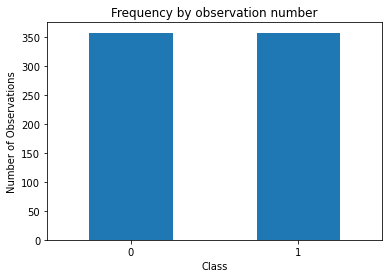

In [19]:
fnf = y_train["Class"].value_counts()
plt.xlabel("Class")
plt.ylabel("Number of Observations")
fnf.plot(kind = 'bar',title = 'Frequency by observation number',rot=0)

### 2. [2.0] Modeling and Understanding Ensemble Methods

#### a. Train a baseline model using a single algorithm (e.g., a linear model such as logistic regression) and assess its performance.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Training the baseline model using a single algorithm Logistic Regression. 

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Assessing it's performance on the training dataset. 

In [22]:
Y_pred = model.predict(X_train)
accurancy = accuracy_score(Y_pred,y_train)
print(accurancy)

0.946927374301676


Assessing it's performance on the test dataset. 

In [23]:
Y_pred = model.predict(X_test)
accurancy = accuracy_score(Y_pred,y_test)
print(accurancy)

0.9758669522371639


#### b. Implement Bagging using a set of homogeneous models (e.g., Decision Trees). Incrementally increase the number of models (from 1 to 10) and analyze the impact on performance. [0.75]

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from numpy import mean
from numpy import std

Implementing Bagging using homogeneoous model Decision Trees. 
Parallely, increasing he number of models from 1 to 10 to compare the difference in accuracy of the model.

In [25]:
for estimators in range(1, 11):
    model = DecisionTreeClassifier()
    bagging = BaggingClassifier(model, n_estimators = estimators, random_state=42)
    bagging.fit(X_train, y_train)
    
    y_pred = bagging.predict(X_test)
    accurancy = accuracy_score(y_pred,y_test)
    print(str(estimators)+ ' ' +str(accurancy))

1 0.8753437964490948
2 0.9638238357735567
3 0.9309481174584225
4 0.9632854651639104
5 0.9487845698301792
6 0.9615182051192023
7 0.9493931626932575
8 0.9612256123965685
9 0.954893905878773
10 0.9613309457767166


When increasing the number of models, the accuracy values obtained vary across different numbers of models. This variability suggests the need to conduct a thorough study to determine the optimal number of models for our dataset before implementing them into our system. One approach that can be employed to identify the most suitable number of models is the utilization of GridSearch. 

#### c. Implement Boosting, also using a set of homogeneous models. Similar to Bagging, increase the number of models incrementally and observe the impact on performance. [0.75]

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

Implementing Boosting using homogeneoous model Decision Trees. Parallely, increasing he number of models from 1 to 10 to compare the difference in accuracy of the model.

In [27]:
for estimators in range(1, 11):
    model = DecisionTreeClassifier()
    boosting = AdaBoostClassifier(model, n_estimators = estimators)
    boosting.fit(X_train, y_train)
    
    Y_pred = boosting.predict(X_test)
    accurancy = accuracy_score(Y_pred,y_test)
    print(str(estimators)+ ' ' +str(accurancy))

1 0.8848823192069567
2 0.8885572838032373
3 0.8817574289292277
4 0.8805987617475978
5 0.8827405404772772
6 0.8793815760214412
7 0.8777313530657865
8 0.8858771344639116
9 0.886520838453706
10 0.8788666128296057


When increasing the number of models, the accuracy values obtained vary across different numbers of models. This variability suggests the need to conduct a thorough study to determine the optimal number of models for our dataset before implementing them into our system. One approach that can be employed to identify the most suitable number of models is the utilization of GridSearch.

### 3. [1.0] Hyperparameter Tuning and Model Quality Evaluation

#### a. From the models you have developed in question/step 2, select one and proceed with hyperparameter optimization. Discuss the selection of parameters you've decided to tune and the range of values you are considering. [0.5]

In [28]:
from sklearn.model_selection import GridSearchCV


Based on the models that have been implemented thus far, I have made the decision to proceed with the Bagging technique.

To proceed with the hyperparameter optimization, we will take numerous paramters and compare them using grid search on the bagging model to find the best parameters without any underfitting or overfitting. 

In [29]:
model = DecisionTreeClassifier()
bagging = BaggingClassifier(model)
bagging.fit(X_train, y_train)
    
parameters = {
    'n_estimators': [10, 20, 25, 30],
    'max_samples': [0.3, 0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0, 2], 
    'random_state': [42]
}

best_parameters = GridSearchCV(bagging, parameters, cv=5, scoring='accuracy')
best_parameters.fit(X_train, y_train)
print("Best Parameters: ", best_parameters.best_params_)
print("Best Accuracy: ", best_parameters.best_score_)

Best Parameters:  {'max_features': 1.0, 'max_samples': 0.3, 'n_estimators': 25, 'random_state': 42}
Best Accuracy:  0.9357420357420356


The parameters I have decided to tune in the Bagging classifier are n_estimators, max_samples, and max_features. I have chosen to keep the random_state as 42 to ensure consistency in the results when running the model multiple times.

n_estimators: This parameter determines the number of decision trees created in the ensemble. To identify the optimal value, I have explored a range of values from 10 to 30. By evaluating the model's performance across different numbers of trees, I can determine the most suitable quantity for achieving desired accuracy.


max_samples: The max_samples parameter allows us to experiment with different values less than 1. A value of 1 indicates that the entire training dataset is utilized for training each base estimator. However, by setting a value less than 1, I can introduce randomness and select a subset of samples for training. This variation in the dataset can potentially enhance the model's performance. I will explore different values within the range to determine the optimal value.


max_features: This parameter controls the number of features considered for each decision tree in the ensemble. By adjusting this value, we can influence the diversification of the ensemble. For instance, a value of 0.5 implies that only two features are used, while a value greater than 1 indicates the inclusion of multiple features. I will explore different values to find the setting that yields the best performance for my model.

After receiving the best parameters and adding them to our model.

In [30]:
model = DecisionTreeClassifier()
bagging = BaggingClassifier(model, n_estimators=20, max_features=1, max_samples=0.3, random_state=42)
bagging.fit(X_train, y_train)

Y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, Y_pred)
print(accuracy)

0.975667989185773


Hence, our model's acccuracy has now increased. 

#### b. Evaluate your optimized model using relevant metrics and graphical representations (e.g., performance graphs). The selected metrics should effectively demonstrate the performance of the model as a function of the hyperparameters. [0.5]

To evaluate the optimized model, we will use different metrics like accuracy, precision, recall, f1-score, support, macro average, weihted average and confusion matrix. 

In [31]:
accurancy = accuracy_score(Y_pred,y_test)
print(str(accurancy))

0.975667989185773


We are getting an accuracy of 0.97. 

Further checking the precision score, recall, f1-score and confusion matrix for both the outputs that is 0 (not fraud) and 1 (fraud)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, Y_pred))
print(confusion_matrix(y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85309
           1       0.05      0.85      0.10       134

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.54     85443
weighted avg       1.00      0.98      0.99     85443

[[83250  2059]
 [   20   114]]


Next, we will evaluate the performance graphs for different parameters. 

In [33]:
parameters = best_parameters.cv_results_['params']
accuracy = best_parameters.cv_results_['mean_test_score']

n_estimators = [parameters['n_estimators'] for parameters in parameters]
max_samples = [parameters['max_samples'] for parameters in parameters]
max_features = [parameters['max_features'] for parameters in parameters]


Evaluating the performace for hyperparameters n_estimators. 

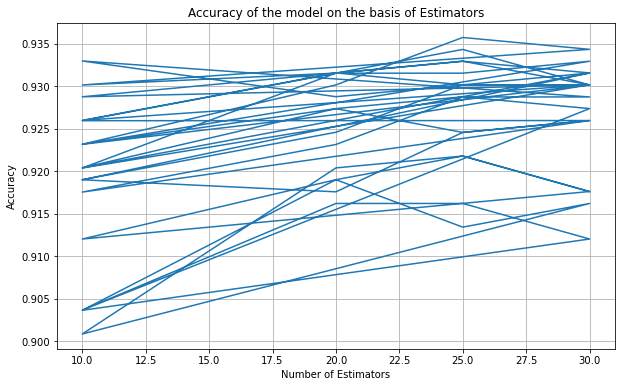

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, accuracy)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model on the basis of Estimators')
plt.grid(True)
plt.show()

Evaluating the performace for hyperparameters max_samples. 

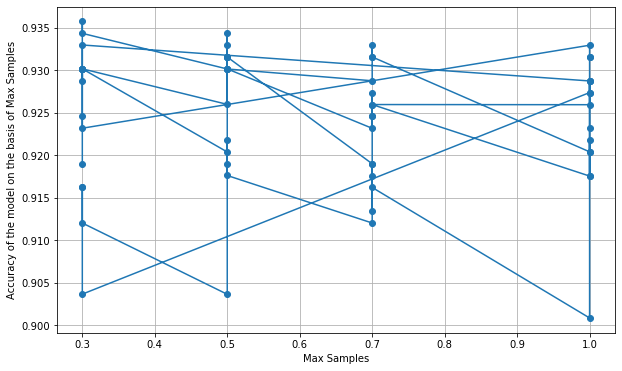

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(max_samples, accuracy, marker='o')
plt.xlabel('Max Samples')
plt.ylabel('Accuracy of the model on the basis of Max Samples')
plt.title('')
plt.grid(True)
plt.show()

Evaluating the performace for hyperparameters max_features. 

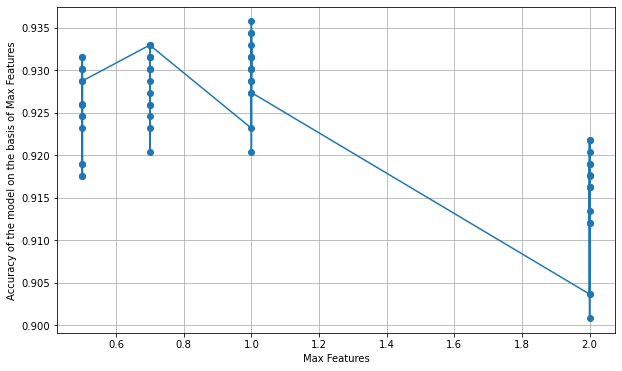

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(max_features, accuracy, marker='o')
plt.xlabel('Max Features')
plt.ylabel('Accuracy of the model on the basis of Max Features')
plt.title('')
plt.grid(True)
plt.show()

Evaluating the performace between the max_samples and n_estimators and compairing their performances.  

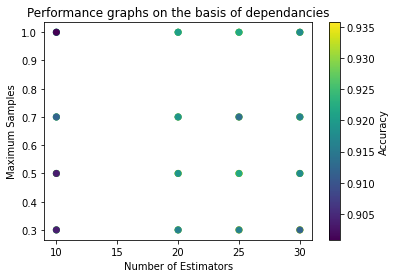

In [37]:
fig, ax = plt.subplots()
sc = ax.scatter(n_estimators, max_samples, c=accuracy)
fig.colorbar(sc, ax=ax, label='Accuracy')
ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Maximum Samples')
ax.set_title('Performance graphs on the basis of dependancies')
plt.show()

Evaluating the performace between the max_features and n_estimators and compairing their performances.  

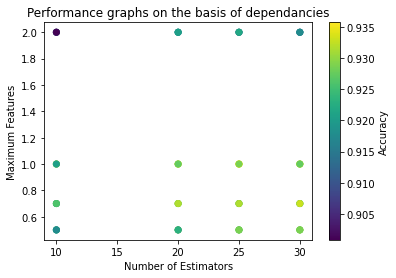

In [38]:
fig, ax = plt.subplots()
sc = ax.scatter(n_estimators, max_features, c=accuracy)
fig.colorbar(sc, ax=ax, label='Accuracy')
ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Maximum Features')
ax.set_title('Performance graphs on the basis of dependancies')
plt.show()

Evaluating the performace between the max_samples and max_features and compairing their performances.  

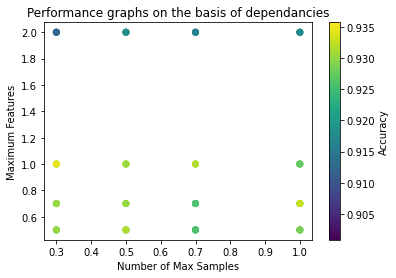

In [39]:
fig, ax = plt.subplots()
sc = ax.scatter(max_samples, max_features, c=accuracy)
fig.colorbar(sc, ax=ax, label='Accuracy')
ax.set_xlabel('Number of Max Samples')
ax.set_ylabel('Maximum Features')
ax.set_title('Performance graphs on the basis of dependancies')
plt.show()

### 4. [1.0] Predictions and Submission

#### a. Make predictions from the model that performed best in question/step 3. Also, provide an analysis of the prediction results. [0.5]

In [58]:
# The best model with tuning was the bagging model

pred = bagging.predict(X_test)

In [57]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85309
           1       0.05      0.85      0.10       134

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.54     85443
weighted avg       1.00      0.98      0.99     85443



The prediction results are very accurate as seen by the classfication report. One important reason for yeilding this accuracy is the number of class category. Since it is just 0 or 1, it is easier for the model to classify into the correct category. The SMOTE function applied to the original dataset also helped fix the imbalance between classes 0 and 1, which made the model predict better, even while predicting class 1. Tuning the model parameters also helped boost the model prediction accuracy rate.

#### b. Prepare your final submission. This should include a .csv file of your results. In addition, reflect on your results, their implications, and any potential improvements that could be implemented. [0.5]

In [55]:
import numpy as np

In [56]:
output_file = f'predictions.csv'
np.savetxt(output_file, pred, delimiter=',', fmt='%d')

The high accuracy of 99% suggests that the bagging model performs exceptionally well in predicting credit card fraud. It demonstrates the model's ability to effectively identify fraudulent transactions and distinguish them from legitimate ones. Such a high accuracy rate is commendable and indicates that the model has successfully captured the underlying patterns in the dataset.

Improved Fraud Detection: With a 99% accuracy rate, the bagging model can significantly contribute to reducing financial losses due to credit card fraud. By accurately identifying fraudulent transactions, financial institutions can take immediate action to prevent unauthorized activities, protect customers, and maintain trust in their services.

Enhanced Customer Experience: By minimizing false positives (legitimate transactions misclassified as fraud), the model can enhance the overall customer experience. Reducing unnecessary card blocks or verification steps for genuine transactions helps ensure a seamless and hassle-free user experience.

Resource Optimization: The highly accurate predictions can assist in efficiently allocating fraud detection resources. By focusing on the transactions flagged as high-risk by the model, organizations can optimize their investigation efforts and dedicate resources where they are most needed, potentially leading to cost savings.

Potential improvements that can be made: 

Ensemble Techniques: Although the bagging model has shown excellent performance, consider experimenting with other ensemble techniques such as boosting or stacking. These techniques might uncover additional patterns or improve the model's predictive capabilities.

Data Quality and Robustness: To further improve the model's performance, it is crucial to continuously assess and enhance the quality and robustness of the dataset. Ensure that the data is up-to-date, reliable, and representative of the real-world credit card transactions. Regular data validation, cleaning, and monitoring processes can help maintain the model's effectiveness.

References:  
   &nbsp;[1] https://github.com/vighneshutamse/Hyperparameter-Tuning/blob/master/Hyperparameter%20Tuning.ipynb  
   &nbsp;[2] https://www.kaggle.com/questions-and-answers/285909  
   &nbsp;[3] https://www.kaggle.com/code/ajaysinghpanwar/credit-card-data  